# Python IUDX SDK - pyIUDX
In this notebook we will use the pyIUDX SDK to interact with IUDX, the India Urban Data Exchange (https://www.iudx.org.in/). IUDX provides easy access to smart city resources, like air quality monitors, smart transportation systems, emergency reporting sensors (flooding), streetlighting metrics, crowd sourced data sources and so on! Along with access, IUDX also provides semantic information about the properties associated with these resources to foster a semantic and wholistic understanding of data. This facilitates richer apps to be developed and provides for intelligent and well integrated analytics.
Visit https://pudx.catalogue.iudx.org.in to explore the dearth of resources available for your consumption.


We encourage you to save a copy on your google drive and try these examples out.


In the first part, we will query and obtain resources as per our requirements. This information is obtained by querying the catalogue server. The catalogue server provides all metadata associated with a sensor, including, sensor type, sensor location, sensor attributes, sensed quantities and their units etc.

In the second part, we will obtain sensed data associated with a set of sensors and perform some simple analytics with it. This section will evoke the power of IUDX and illustrate how dynamic apps and analytics can be developed.

## Install pyIUDX SDK module

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium

In [0]:
# install the latest version of pyIUDX module from github
pip install git+https://github.com/iudx/pyIUDX

  Cloning https://github.com/iudx/pyIUDX to /tmp/pip-req-build-943rrtd1
  Running command git clone -q https://github.com/iudx/pyIUDX /tmp/pip-req-build-943rrtd1
  Created wheel for pyIUDX: filename=pyIUDX-0.0.1-cp36-none-any.whl size=22775 sha256=e9e4ac5a3c6d73fae8014948bd5feaecdfe7c50797640afeca8d93d95340f8d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-pzehyd0g/wheels/9a/47/49/4628dcd08582cacb7599b922e10d77572044b4c49fe076e0e8
Successfully built pyIUDX


## Accessing Catalogue server
All sensor properties are stored in the catalogue server. Querying the catalog entry for a given sensor provides us metadata and information about the sensor, particularly:
* The sendor id (the unique id with which we query the sensor information and data)
* Tags associated with the sensor
* Information on the type of data provided by the sensor and their units

### Import *cat* class from *pyIUDX.cat*
The *cat* class provides the APIs to fetch data from the catalogue server.

In [0]:
from pyIUDX.cat import cat

In [0]:
# Specify the catalogue server details.
# initialize a catalogue class
cat = cat.Catalogue("https://pudx.catalogue.iudx.org.in/catalogue/v1")

### Search for catalogue items (sensors)
*getManyResourceItems* member of the catalogue class can be used to fetch a filtered version of catalogue items. The example below shows how to obtain items (sensors) whose tags attribute have the values "aqi" or "aqm". The metadata is returned as a list of dictionary item for each sensor.

In [0]:
attributes = {"tags": ["aqi", "aqm", "climo"]}
allAQMItems = cat.getManyResourceItems(attributes)

In [0]:
print(allAQMItems[0:2])

[{'@context': ['https://raw.githubusercontent.com/iudx/iudx-ld/master/data_models/environment/airQuality/env_aqm_climoPune_0.json'], 'onboardedBy': 'Technical consultant at rbccps.org', 'itemDescription': 'Describes Air Quality Monitoring (AQM) Resource.', 'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ABC Farm House Junction_4', 'deviceModelInfo': {'type': 'Property', 'value': {'url': 'http://www.boschclimo.com/', 'brand': 'Climo', 'model': 'Bosch-Climo'}}, 'refBaseSchema': {'type': 'Relationship', 'value': 'https://raw.githubusercontent.com/iudx/iudx-ld/master/base_schemas/v0.0.0/resourceItem_schema.json'}, 'itemType': {'type': 'Property', 'value': 'resourceItem'}, 'tags': {'type': 'Property', 'value': ['environment', 'air quality', 'air', 'aqi', 'aqm', 'climo', 'climate', 'pollution', 'so2', 'co2', 'co', 'no', 'no2', 'pm2.5', 'pm25', 'lux', 'pm10', 'humidity', 'temperature', 'ozone', 'o3', 'noise', 'light', 'uv']}, 'resourceServerGrou

In [0]:
allAQMItemsCount = cat.getItemCount(attributes)

In [0]:
print(allAQMItemsCount)

62


### Filter the catalogue response
An unfiltered call to *getManyResourceItems* will return all information associated with each sensor. Using the filters option, we can filter the information returned.

In the example below, by specifying the filters = ["id"], only the "id" of the sensor is returned.

In [0]:
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters)

In [0]:
print(allAQMItemsByID[0:3])

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ABC Farm House Junction_4'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Ambedkar society circle_29'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Appa_Balwant_Square_30'}]


### Filter items (sensors) by geo-location
The function *getManyResourceItems* can also be used to filter items (sensors) based on their locations. In the example below, we specify the area of interest as a circle with center specified by latitude ("lat") and longitude ("lon") and radius in meters.
In this case, we are requesting for sensors around a 3km radius.
We also will specify that we are specifically interested in Air Quality Monitoring Stations present in that region.
We only require the ID's for now, which we can obtain by passing a filters option

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 3000}}
attributes = {"tags": ["aqi", "aqm", "climo"]}
filters = ["id"]


The below call returns all sensors with tags "aqi" or "aqm" and within the geographical area specified. Further, as specified by the filters argument, only the "id" information is returned for each of the sensors.


In [0]:
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)

In [0]:
print(allAQMItemsByID)
print("Number of items = ", len(allAQMItemsByID))

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Goodluck Square_Cafe_23'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune_ST_Stand_40'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune Railway Station_28'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Sadhu_Wasvani_Square_24'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/RTO Square_8'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Appa_Balwant_Square_30'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Chitale Bandhu Corner_41'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/PMPML_Bus_Depot_Deccan_15'}, {'id': 'rbccps.org/aa9d

## Fetch data from sensors
In this section we will fetch sensor data from the resource server and show off a little bit of the magic of IUDX.

### Import *item* class from *pyIUDX.rs*
The *item* class provides the APIs to access relevant sensor data.
This is a high level abstraction module which encapsulates multiple functionalities of IUDX such as fetching meta information from data models and live data from  resource servers

In [0]:
# Import the item class from pyIUDX.rs
from pyIUDX.rs import item


### Plot sensor locations

We can pass the previously obtained list of filtered Air Quality Monitoring stations to the Items class. This will load a list of resourceItem objects and provide neat access to their data.

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 3000}}
attributes = {"tags": ["aqm"]}
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)

In [0]:


m = folium.Map(location=[18.5204,73.8567],zoom_start=12)
aqms = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", allAQMItemsByID)
print(aqms[0].geoProperties)
for sensor in aqms:
  sensor_id = sensor.id  
  print("Sensor location = ", sensor.location.coordinates)
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(m)    
m

['location']
Sensor location =  [73.8723841, 18.527615]
Sensor location =  [73.841424, 18.517439]
Sensor location =  [73.876484, 18.525007]
Sensor location =  [73.874537, 18.528311]
Sensor location =  [73.863395, 18.529578]
Sensor location =  [73.8525898, 18.5137013]
Sensor location =  [73.854009, 18.516644]
Sensor location =  [73.842727, 18.516163]
Sensor location =  [73.8480461, 18.522622]
Sensor location =  [73.8494754, 18.5320014]
Sensor location =  [73.84992, 18.530344]


### Fetch Quantitative Properties 
We will iterate across the list of sensors and obtain *PM10_MAX* values and its meta-information. Further, we will also obtain data for a specified duration.
You can find the data model for an AQM sensor here 
https://github.com/iudx/iudx-ld/blob/master/data_models/environment/airQuality/env_aqm_climoPune_0.json

Let's use one of the items form the list of sensors we just created

In [0]:
print(aqms[0].id)

rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune_ST_Stand_40


We can find out all the QuantitativeProperties (measured properties) of an aqm item by calling the Object.quantitativeProperties property.
Since our previous filter filtered out all AQM sensors, we can assume that the quantitative properties for sensor aqms[0] is the same for the rest.

In [0]:
print(aqms[0].quantitativeProperties)

['AIR_PRESSURE', 'AQI', 'CO2_MAX', 'CO2_MIN', 'CO_MAX', 'CO_MIN', 'HUMIDITY', 'LIGHT', 'NO2_MAX', 'NO2_MIN', 'NO_MAX', 'NO_MIN', 'OZONE_MAX', 'OZONE_MIN', 'PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'SO2_MAX', 'SO2_MIN', 'TEMPRATURE_MAX', 'UV_MAX', 'UV_MIN']


A quantitativeProperty also has further meta information related to that property, such as a detailed description, units, etc.
We can get a list of such attributes for a quantitativeProperty, and access them directly.
For e.g, for PM10_MAX.


In [0]:
print(aqms[0].CO2_MAX.attributes)
print("Name of the property is " + aqms[0].CO2_MAX.symbol)
print("Units of the property are " + aqms[0].CO2_MAX.symbol)
print("The property tells us the " + aqms[0].CO2_MAX.describes)

{'name': 'CO2_MAX', 'describes': 'Maximum value of CO2 for the last 24 hours', 'symbol': 'ppm', 'unitCode': 'X59', 'unitText': 'part per million (ppm)'}
Name of the property is ppm
Units of the property are ppm
The property tells us the Maximum value of CO2 for the last 24 hours


We need to call the object's latest() method to get the latest data .
Calling aqms.latest() will update the latest values of all these properties and for **all the previously filtered sensors**.

In [0]:
aqms.latest()

<Items [<pyIUDX.rs.item.Item object at 0x7f7a58f2edd8>, <pyIUDX.rs.item.Item object at 0x7f7a58f2ee10>, <pyIUDX.rs.item.Item object at 0x7f7a58f29390>, <pyIUDX.rs.item.Item object at 0x7f7a58f2e390>, <pyIUDX.rs.item.Item object at 0x7f7a58f57f98>, <pyIUDX.rs.item.Item object at 0x7f7a58f4feb8>, <pyIUDX.rs.item.Item object at 0x7f7a58ee8518>, <pyIUDX.rs.item.Item object at 0x7f7a58ee84e0>, <pyIUDX.rs.item.Item object at 0x7f7a58ef6240>, <pyIUDX.rs.item.Item object at 0x7f7a58f07fd0>, <pyIUDX.rs.item.Item object at 0x7f7a58f07240>]>

We can now call aqms[0]."quantitativeProperty".value to obtain a numpy array with the first column as datetime and second column as that property's value.
A quantitativeProperty always has a .value attribute.


In [0]:
aqms[0].CO2_MAX.value

array([[datetime.datetime(2019, 11, 29, 12, 31, 16, 763000), 545.0]],
      dtype=object)

Calling latest() once is enough. We can access other quantitativeProperties as well.

In [0]:
aqms[0].SO2_MAX.value

array([[datetime.datetime(2019, 11, 29, 12, 31, 16, 763000), 7.0]],
      dtype=object)

Supposing there is a need to find the trend of a particular property over a period of time. We can use Items object's during() functionality to show a time series view of that quantitativeProperty. We need to specify the start and end time in utc format. Let's get the data during 25th October 2019 and 2nd November 2019.

In [0]:
aqms.during("2019-10-26T00:00:00.000+05:30", "2019-11-02T00:00:00.000+05:30")



<Items [<pyIUDX.rs.item.Item object at 0x7f7a58de6400>, <pyIUDX.rs.item.Item object at 0x7f7a58db55f8>, <pyIUDX.rs.item.Item object at 0x7f7a58eadba8>, <pyIUDX.rs.item.Item object at 0x7f7a58ec3898>, <pyIUDX.rs.item.Item object at 0x7f7a58d9e588>, <pyIUDX.rs.item.Item object at 0x7f7a58db5198>, <pyIUDX.rs.item.Item object at 0x7f7a58c1b400>, <pyIUDX.rs.item.Item object at 0x7f7a58db52e8>, <pyIUDX.rs.item.Item object at 0x7f7a58bb0940>, <pyIUDX.rs.item.Item object at 0x7f7a58bd7f98>, <pyIUDX.rs.item.Item object at 0x7f7a58b60048>]>

Now we can repeat what we did earlier and find the value of the quantitativeProperty **during** that period of time for **sensor 1**

In [0]:
print(aqms[1].PM10_MAX.value[0:10,:])

[[datetime.datetime(2019, 10, 26, 0, 1, 24) 30.0]
 [datetime.datetime(2019, 10, 26, 0, 16, 17) 30.0]
 [datetime.datetime(2019, 10, 26, 0, 31, 28) 30.0]
 [datetime.datetime(2019, 10, 26, 0, 46, 16) 30.0]
 [datetime.datetime(2019, 10, 26, 1, 1, 19) 30.0]
 [datetime.datetime(2019, 10, 26, 1, 16, 31) 30.0]
 [datetime.datetime(2019, 10, 26, 2, 28, 4) 29.0]
 [datetime.datetime(2019, 10, 26, 2, 42, 57) 29.0]
 [datetime.datetime(2019, 10, 26, 2, 57, 56) 29.0]
 [datetime.datetime(2019, 10, 26, 3, 12, 57) 29.0]]


We can utilize all of the other meta information that's part of the object and plot it right away!

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'PM10_MAX (ug/m3)')

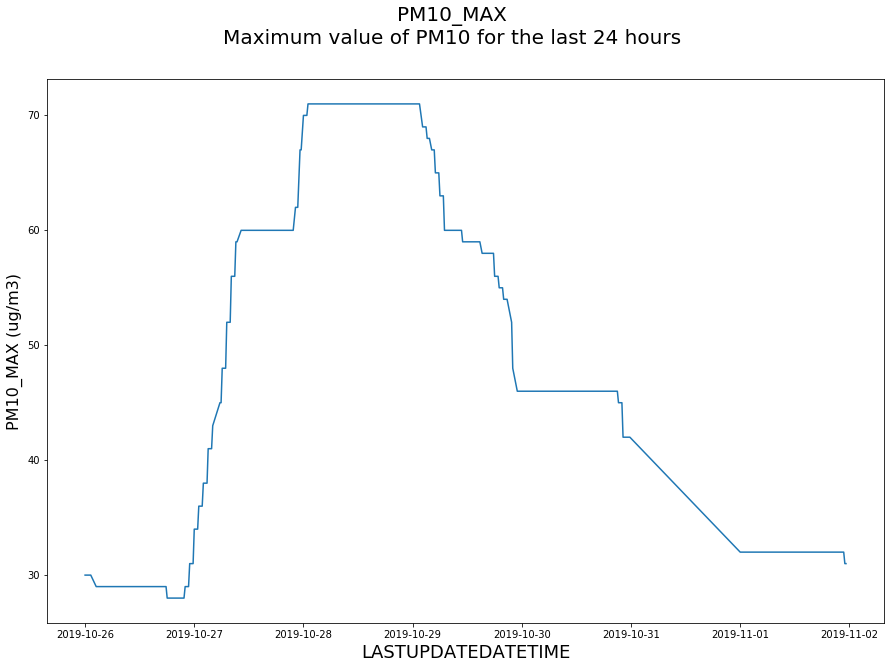

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

fig.suptitle(aqms[1].PM10_MAX.name + "\n" + aqms[1].PM10_MAX.describes, fontsize=20)
plt.plot(aqms[1].PM10_MAX.value[:,0], aqms[1].PM10_MAX.value[:,1])
plt.xlabel(aqms[1].timeProperty, fontsize=18)
plt.ylabel(aqms[1].PM10_MAX.name + " (" + aqms[1].PM10_MAX.symbol + ")", fontsize=16)

### IUDX Magic!
We can repeat the above for all the selected sensors!
Dynamically populating the x and y axis, showing the units of measurement and many more!

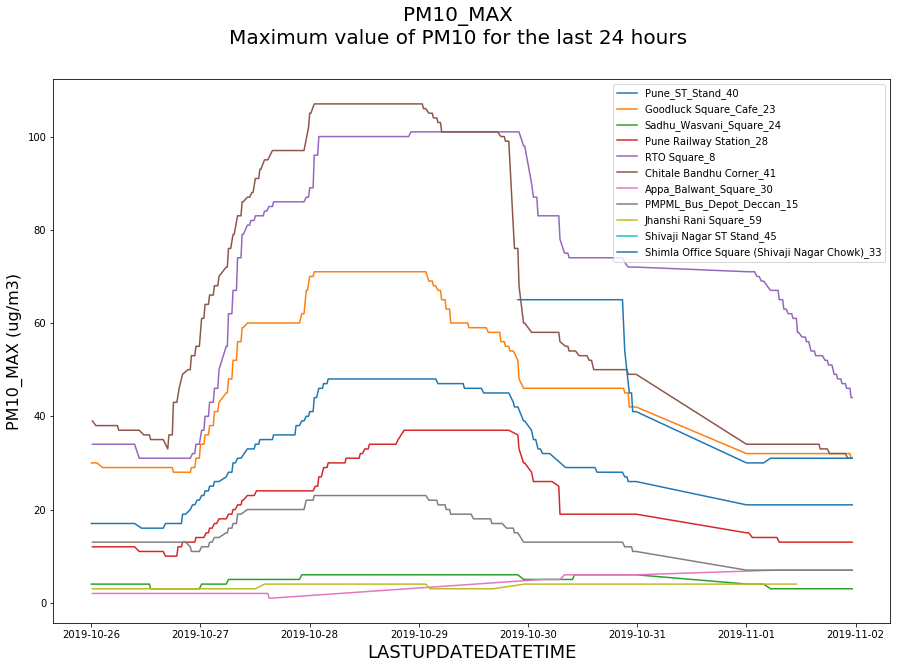

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
fig.suptitle(aqms[0].PM10_MAX.name + "\n" + aqms[0].PM10_MAX.describes, fontsize=20)
plt.xlabel(aqms[0].timeProperty, fontsize=18)
plt.ylabel(aqms[0].PM10_MAX.name + " (" + aqms[0].PM10_MAX.symbol + ")", fontsize=16)

for sensor in aqms:
  plt.plot(sensor.PM10_MAX.value[:,0], sensor.PM10_MAX.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.show()

Notice how the pollution significantly peaks around deepavali (28th-30th october)!

### Geo-spatial analytics with IUDX
Let's do something a bit more advance. 
Let's plot the geo-spatial distrubution of PM10 across the entire city of Pune.

Install a few dependencies and import a few libraries.

In [0]:
!pip install geojsoncontour


In [0]:
from folium import plugins
import geojsoncontour
import scipy.ndimage
import scipy as sp
from scipy.interpolate import griddata



Let's extend our analysis to a large area, about 60 kms in diameter. This covers most Pune city.
Again, we use the catalogue to filter out sensors within a wide region and pass it to the Items class.

In [0]:
from pyIUDX.rs import item
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 30000}}
attributes = {"tags": ["aqm"]}
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)
print(allAQMItemsByID)
aqms = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", allAQMItemsByID)



[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Nanded City Entry_42'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Sadanand Hotel Square_39'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Chandani Square_25'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Susgaon_46'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Bremen Square_37'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/BopadiSquare_65'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ChurchKhadakiRailwayStation_36'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Goodluck Square_Cafe_23'}, {'id': 'rbccps.org/aa9d66a000d94a78

Let's now get the latest data from these sensors.
This will take about 30 seconds on the cloud

In [0]:
aqms.latest()

<Items [<pyIUDX.rs.item.Item object at 0x7f7a4d948f28>, <pyIUDX.rs.item.Item object at 0x7f7a4d8d3198>, <pyIUDX.rs.item.Item object at 0x7f7a4d8d8a90>, <pyIUDX.rs.item.Item object at 0x7f7a4d90a4a8>, <pyIUDX.rs.item.Item object at 0x7f7a4d929668>, <pyIUDX.rs.item.Item object at 0x7f7a4d92fef0>, <pyIUDX.rs.item.Item object at 0x7f7a4d9554a8>, <pyIUDX.rs.item.Item object at 0x7f7a4d8f3cc0>, <pyIUDX.rs.item.Item object at 0x7f7a4d8ff588>, <pyIUDX.rs.item.Item object at 0x7f7a4d804b00>, <pyIUDX.rs.item.Item object at 0x7f7a4d7d2e80>, <pyIUDX.rs.item.Item object at 0x7f7a4d7db7b8>, <pyIUDX.rs.item.Item object at 0x7f7a4d90af28>, <pyIUDX.rs.item.Item object at 0x7f7a4d898748>, <pyIUDX.rs.item.Item object at 0x7f7a4d8a80b8>, <pyIUDX.rs.item.Item object at 0x7f7a4d923eb8>, <pyIUDX.rs.item.Item object at 0x7f7a4d8c2358>, <pyIUDX.rs.item.Item object at 0x7f7a4d847c50>, <pyIUDX.rs.item.Item object at 0x7f7a4d8629b0>, <pyIUDX.rs.item.Item object at 0x7f7a4d7a1470>, <pyIUDX.rs.item.Item object at 0

Make numpy arrays of all the items locations and values.

In [0]:
# Get the latest PM_10 values for all aqms
zs = []
x_orig = []
y_orig = []
for aqm in aqms:
  val = aqm.PM10_MAX.value[:, 1].astype("float")
  if val.size > 0:
    zs.append(val[0])
    x_orig.append(aqm.location.coordinates[0])
    y_orig.append(aqm.location.coordinates[1])

x_orig = np.array(x_orig)
y_orig = np.array(y_orig)
zs = np.array(zs)

Initialize the map and show all sensor locations

In [0]:
# Initialize the map
geomap = folium.Map([y_orig.mean(), x_orig.mean()], zoom_start=13, tiles="cartodbpositron")

for sensor in aqms:
  sensor_id = sensor.id  
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(geomap)  

geomap  

We are now ready to perform the analytic. 
This is a rather simple example where we perform cubic geo-spatial interplation of PM10_MAX concentrations across Pune. We will see where the major pollutant hotspots are located

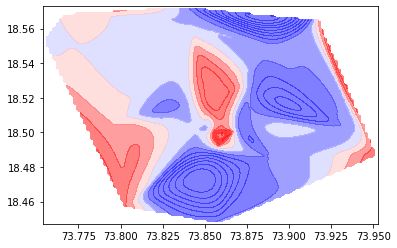

In [0]:
# Make lat and lon linspace
y_arr = np.linspace(np.min(y_orig), np.max(y_orig), 100)
x_arr = np.linspace(np.min(x_orig), np.max(x_orig), 100)
# Make mesh grid
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)


# Perform cubic interpolation
z_mesh = griddata((x_orig, y_orig), zs, (x_mesh, y_mesh), method='cubic')
# Number of levels of colors
levels = 20
# Make contours of the fird value obtained in z_mesh
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, cmap="bwr", linestyles='None', vmin=0, vmax=100)

# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)

# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   0.6,
    }).add_to(geomap)

# Show map
geomap


## Downloading larger datasets
Because of the large size of the data availabe, we have restricted PUDX "during" queries to only work when the time is less than one day. If data for a longer period is required, you will be needing the download API.
We will however need the resourceServerGroup id instead of the id for this. To find this, you can go to pudx.catalogue.iudx.org.in and search for aqm with tags. Once the item is shown in the list view, you can click "details" and obtain the group id.
The resourceServerGroup id for AQM is "urn:iudx-catalogue-pune:pudx-resource-server/aqm-bosch-climo"

This will now give us a Google Drive link which we can use to download files based on weeks of the year. 

In [0]:
from pyIUDX.rs import rs

rs = rs.ResourceServer("https://pudx.resourceserver.iudx.org.in/resource-server/pscdcl/v1")

groupId = "urn:iudx-catalogue-pune:pudx-resource-server/aqm-bosch-climo"

data = rs.downloadData(groupId)
data

{'download_URL': 'https://drive.google.com/open?id=12CnB-b2lvhts9q34TFzi-2YNcP9CUhK4',
 'resourceServerGroup': 'urn:iudx-catalogue-pune:pudx-resource-server/aqm-bosch-climo'}

On opening that download_URL, you will find different files corresponding to different weeks of the year for AQM. You can then use python pyDrive module to download that file.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.files import GoogleDriveFile
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate with Google Drive. This will ask you to follow a link and allow access. You need to have a gmail account. Once you have accessed the link 

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
files = GoogleDriveFile(auth=gauth)

In [0]:
folder_id = data["download_URL"].split("=")[-1]
file_list = drive.ListFile({'q': "'%s' in parents and trashed=false" % folder_id}).GetList()

for f in file_list:
  print(f["title"])

aqm-bosch-climo-Week_14.json
aqm-bosch-climo-Week_15.json
aqm-bosch-climo-Week_16.json
aqm-bosch-climo-Week_17.json
aqm-bosch-climo-Week_18.json
aqm-bosch-climo-Week_19.json
aqm-bosch-climo-Week_21.json
aqm-bosch-climo-Week_20.json
aqm-bosch-climo-Week_22.json
aqm-bosch-climo-Week_23.json
aqm-bosch-climo-Week_24.json
aqm-bosch-climo-Week_25.json
aqm-bosch-climo-Week_26.json
aqm-bosch-climo-Week_27.json
aqm-bosch-climo-Week_28.json
aqm-bosch-climo-Week_29.json
aqm-bosch-climo-Week_30.json
aqm-bosch-climo-Week_31.json
aqm-bosch-climo-Week_32.json
aqm-bosch-climo-Week_33.json
aqm-bosch-climo-Week_34.json
aqm-bosch-climo-Week_35.json
aqm-bosch-climo-Week_36.json
aqm-bosch-climo-Week_37.json
aqm-bosch-climo-Week_38.json
aqm-bosch-climo-Week_40.json
aqm-bosch-climo-Week_39.json
aqm-bosch-climo-Week_38.json
aqm-bosch-climo-Week_27.json
aqm-bosch-climo-Week_19.json
aqm-bosch-climo-Week_36.json
aqm-bosch-climo-Week_20.json
aqm-bosch-climo-Week_37.json
aqm-bosch-climo-Week_14.json
aqm-bosch-clim

Let's get data for one such week.

In [0]:
fl = file_list[0]
fl.GetContentFile(fl["title"])

In [0]:
!ls

adc.json  aqm-bosch-climo-Week_14.json	sample_data


In [0]:
import json 

with open(fl["title"], "r") as f:
  df_json = json.load(f)
""" The first data point in the downloaded data """
df_json[0:1]

[{'AIR_PRESSURE': '0.932',
  'AQI': '81.05',
  'AQI_POLLUTANT': 'CO',
  'CATEGORY': 'SATISFACTORY',
  'CO2_MAX': '29',
  'CO2_MIN': '29',
  'CO_MAX': '101',
  'CO_MIN': '38',
  'DEVICEID': '145bacfd-da11-d35f-ed80-ce7475d9bf3d-sensoragent',
  'HUMIDITY': '15.12',
  'LASTUPDATEDATETIME': '2019-04-07T18:24:56.000000+05:30',
  'LIGHT': '576.903',
  'NAME': 'Vishrantwadi junction_6',
  'NO2_MAX': '41',
  'NO2_MIN': '18',
  'NO_MAX': None,
  'NO_MIN': None,
  'OZONE_MAX': '61',
  'OZONE_MIN': '0',
  'PM10_MAX': '36',
  'PM10_MIN': '30',
  'PM2_MAX': '28',
  'PM2_MIN': '23',
  'SO2_MAX': '9',
  'SO2_MIN': '1',
  'SOUND': '72.256',
  'STATUS': 'ON',
  'TEMPRATURE_MAX': '42',
  'TEMPRATURE_MIN': '24',
  'UV_MAX': '1.7',
  'UV_MIN': '0.1',
  '__resource-group': 'aqm-bosch-climo',
  '__resource-id': 'pudx-resource-server/aqm-bosch-climo/Vishrantwadi junction_6'}]

Doing you analysis this way might be simpler that using the Item() module as was shown previously, but it hides away some of the meta information that you would need, for example location. This can still be overcome by querying for the location of the "NAME" field in the data packet as shown below.
Refer to - getOneresourceItem in https://pyiudx.readthedocs.io/en/latest/pyIUDX.cat.html

In [0]:
attributes = {"NAME": [df_json[0]["NAME"]]}
item = cat.getManyResourceItems(attributes)[0]
item

{'@context': ['https://raw.githubusercontent.com/iudx/iudx-ld/master/data_models/environment/airQuality/env_aqm_climoPune_0.json'],
 'DEVICEID': {'type': 'Property',
  'value': '145bacfd-da11-d35f-ed80-ce7475d9bf3d'},
 'NAME': {'type': 'Property', 'value': 'Vishrantwadi junction_6'},
 'createdAt': {'type': 'TimeProperty',
  'value': 'Fri Nov 01 05:31:01 UTC 2019'},
 'deviceModelInfo': {'type': 'Property',
  'value': {'brand': 'Climo',
   'model': 'Bosch-Climo',
   'url': 'http://www.boschclimo.com/'}},
 'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Vishrantwadi junction_6',
 'itemDescription': 'Describes Air Quality Monitoring (AQM) Resource.',
 'itemStatus': {'type': 'Property', 'value': 'active'},
 'itemType': {'type': 'Property', 'value': 'resourceItem'},
 'location': {'type': 'GeoProperty',
  'value': {'address': 'ABD area, Pune',
   'geometry': {'coordinates': [73.8785177, 18.5724037], 'type': 'Point'}}},
 'onboardedBy': 'Technical

Obtaining location for this is now simple -

In [0]:
item["location"]["value"]["geometry"]["coordinates"]

[73.8785177, 18.5724037]

Bear in mind, the location is a geo-json and the latitude and longitude are interchanged. This is because usually coordinates are mentioned as [x, y] where x axis is usually the longitude and lattitude. However, most of the mapping utitilities consider [y, x] or [latitude, longitude]. You will have to interchange the latitude and longitude in this case.

### Grouping in pandas
The downloaded data can be grouped by "NAME" field and help you in generating a dataset. You will need Pandas for this.

In [0]:
import pandas as pd

df_aqm = pd.DataFrame(df_json)
df_aqm.head(3)

,SOUND,TEMPRATURE_MIN,LASTUPDATEDATETIME,LIGHT,SO2_MIN,CO_MAX,SO2_MAX,CO2_MAX,CO_MIN,AIR_PRESSURE,__resource-id,AQI,STATUS,CO2_MIN,OZONE_MAX,PM10_MAX,TEMPRATURE_MAX,NO_MIN,NO_MAX,NO2_MAX,CATEGORY,NAME,AQI_POLLUTANT,NO2_MIN,OZONE_MIN,HUMIDITY,PM2_MIN,__resource-group,DEVICEID,UV_MIN,PM10_MIN,UV_MAX,PM2_MAX
0,72.256,24,2019-04-07T18:24:56.000000+05:30,576.903,1,101,9,29,38,0.932,pudx-resource-server/aqm-bosch-climo/Vishrantw...,81.05,ON,29,61,36,42,None,None,41,SATISFACTORY,Vishrantwadi junction_6,CO,18,0,15.12,23,aqm-bosch-climo,145bacfd-da11-d35f-ed80-ce7475d9bf3d-sensoragent,0.1,30,1.7,28
1,64.714,25,2019-04-07T18:24:56.000000+05:30,1345.004,5,88,6,29,29,0.931,pudx-resource-server/aqm-bosch-climo/VS_Khande...,171.2,ON,29,41,40,40,None,None,100,MODERATE,VS_Khandekar_Square_17,NO2,93,0,17.864,27,aqm-bosch-climo,b075ef08-a5cc-e920-6be3-f57e5b7731c5-sensoragent,0.1,35,5,30
2,87.682,25,2019-04-07T18:24:56.000000+05:30,2691.99,1,106,12,29,42,0.929,pudx-resource-server/aqm-bosch-climo/Susgaon_46,144.81,ON,29,46,42,41,None,None,109,MODERATE,Susgaon_46,NO2,75,0,17.336,19,aqm-bosch-climo,3d3a569a-1a89-c3b6-671c-5675e4132c32-sensoragent,0.1,25,1,32


Now we can group by "NAME" field -

In [0]:
df_grouped = df_aqm.groupby("NAME")
print("Getting data frame for " + df_json[0]["NAME"])
some_aqm_sensor = df_grouped.get_group(df_json[0]["NAME"])
some_aqm_sensor.head(3)


Getting data frame for Vishrantwadi junction_6


,SOUND,TEMPRATURE_MIN,LASTUPDATEDATETIME,LIGHT,SO2_MIN,CO_MAX,SO2_MAX,CO2_MAX,CO_MIN,AIR_PRESSURE,__resource-id,AQI,STATUS,CO2_MIN,OZONE_MAX,PM10_MAX,TEMPRATURE_MAX,NO_MIN,NO_MAX,NO2_MAX,CATEGORY,NAME,AQI_POLLUTANT,NO2_MIN,OZONE_MIN,HUMIDITY,PM2_MIN,__resource-group,DEVICEID,UV_MIN,PM10_MIN,UV_MAX,PM2_MAX
0,72.256,24,2019-04-07T18:24:56.000000+05:30,576.903,1,101,9,29,38,0.932,pudx-resource-server/aqm-bosch-climo/Vishrantw...,81.05,ON,29,61,36,42,None,None,41,SATISFACTORY,Vishrantwadi junction_6,CO,18,0,15.12,23,aqm-bosch-climo,145bacfd-da11-d35f-ed80-ce7475d9bf3d-sensoragent,0.1,30,1.7,28
43,72.256,24,2019-04-07T18:09:51.000000+05:30,968.634,1,101,9,29,38,0.932,pudx-resource-server/aqm-bosch-climo/Vishrantw...,80.05,ON,29,61,36,42,None,None,41,SATISFACTORY,Vishrantwadi junction_6,CO,18,0,15.12,23,aqm-bosch-climo,145bacfd-da11-d35f-ed80-ce7475d9bf3d-sensoragent,0.1,30,1.7,28
48,72.155,24,2019-04-07T17:54:52.000000+05:30,null,1,101,9,29,38,0.932,pudx-resource-server/aqm-bosch-climo/Vishrantw...,80.28,ON,29,61,36,42,None,None,41,SATISFACTORY,Vishrantwadi junction_6,CO,18,0,15.116,23,aqm-bosch-climo,145bacfd-da11-d35f-ed80-ce7475d9bf3d-sensoragent,0.1,30,1.7,28


# Conclusion

To recap, we've shown you a simple flow of obtaining the different sensors available in a region using the Catalogue module. We've taken this information and passed it to the Items module which provides a complex abstraction over the selected items and makes data access simple. We've then gone on to plot the different quantitative properties for an air quality monitor across the city and used IUDX's magic to dynamically give us the units, locations, and information about a pollutant, PM 10. Lastly we showed how IUDX makes complex analytics simple by helping discover and handle data. 

We encourage you to download this notebook and tinker around. Feedback is welcome. Visit https://github.com/iudx/pyIUDX for more advance usage and report errors/enhancement requests.